In [1]:
import numpy as np
import itertools
import image_transforms

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(-1,28,28,1).astype(np.int16)
test_images = test_images.reshape(-1,28,28,1).astype(np.int16)

Using TensorFlow backend.


In [30]:
translation = list(itertools.product([getattr(image_transforms,"image_translation")], [(10+10*k,10+10*k) for k in range(10)]))
scale = list(itertools.product([getattr(image_transforms, "image_scale")], [(1.5+0.5*k,1.5+0.5*k) for k in range(10)]))
shear = list(itertools.product([getattr(image_transforms, "image_shear")], [(-1.0+0.1*k,0) for k in range(10)]))
rotation = list(itertools.product([getattr(image_transforms, "image_rotation")], [3+3*k for k in range(10)]))
contrast = list(itertools.product([getattr(image_transforms, "image_contrast")], [1.2+0.2*k for k in range(10)]))
brightness = list(itertools.product([getattr(image_transforms, "image_brightness")], [10+10*k for k in range(10)]))
blur = list(itertools.product([getattr(image_transforms, "image_blur")], [k+1 for k in range(10)]))

G = translation + rotation
P = contrast + brightness + blur
A = P

In [128]:
initial_image = test_images[np.random.randint(len(test_images))].reshape(28,28,1)
mutated_image = np.copy(initial_image)
for i in range(10):
    s = np.random.randint(len(A))
    t, p = A[s]
    print(t, p)
    mutated_last = np.copy(mutated_image)
    mutated_image = t(mutated_image, p).reshape(28,28,1)
    if np.sum((mutated_image - initial_image)**2) / mutated_image.size > 800:
        print("break")
        break

<function image_blur at 0x00000288D74A38C8> 2
break


In [129]:
import matplotlib.pyplot as plt

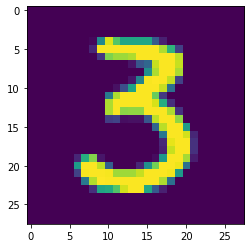

In [130]:
plt.imshow(initial_image.reshape(28,28))

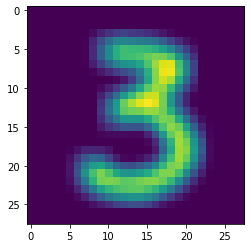

In [131]:
plt.imshow(mutated_image.reshape(28,28))